## 比较与评估性能

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 用训练数据测试

## 1.Logistic 回归

### 1.1 预测

In [2]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X,y)

logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
# 保存预测结果
y_pred = logreg.predict(X)
print(len(y_pred))

150


### 1.2 评估
使用metrics模块评估

In [5]:
from sklearn import metrics

print(metrics.accuracy_score(y,y_pred))

0.96


## 2.KNN(K=5)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.966666666667


## 3.KNN(K=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

1.0


# 划分训练与测试数据

In [10]:
from sklearn.cross_validation import train_test_split

#help(train_test_split)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)
print(len(X_train),len(y_test))

90 60


## 1.Logistic

In [12]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.916666666667


## 2.KNN(k=5)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.983333333333


## 3.KNN(k=1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


# 评估参数
可以查看k取不同值时的精确度

In [20]:
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
print(scores)

[0.94999999999999996, 0.94999999999999996, 0.96666666666666667, 0.93333333333333335, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 1.0, 0.98333333333333328, 0.96666666666666667, 0.98333333333333328, 0.96666666666666667, 0.94999999999999996, 0.96666666666666667, 0.96666666666666667, 0.94999999999999996, 0.94999999999999996, 0.91666666666666663, 0.91666666666666663]


### 使用matplot显示

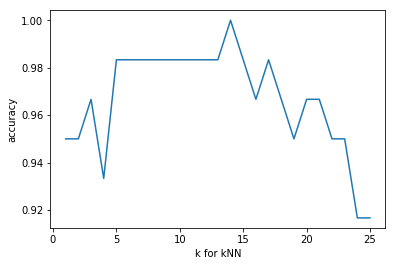

In [21]:
import matplotlib.pyplot as plt

plt.plot(k_range,scores)
plt.xlabel('k for kNN')
plt.ylabel('accuracy')
plt.show()